### Sequence where y_i = xor(x_1, x_2, ... x_i)

In [2]:
import numpy as np
import pandas as pd
import matplotlib as plt
from sklearn.metrics import f1_score
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data as data
import torch.optim as opt
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

In [65]:
class LSTM(nn.Module):
    def __init__(self, hidden_size, x_size, y_size):
        super().__init__()
        self.hidden_size = hidden_size
        self.x_size = x_size
        self.y_size = y_size
        
        self.Whu = nn.Linear(hidden_size, hidden_size)
        self.Wxu = nn.Linear(x_size, hidden_size)
        self.g1 = nn.Tanh()
        
        self.Wuy = nn.Linear(hidden_size, y_size)
    
    def forward(self, x, h):
        u = self.g1(self.Wxu(x) + self.Whu(h.clone().detach()))
        new_h = h + u
        return self.Wuy(new_h), new_h

In [69]:
def geseq_len(n=10):
    x = torch.rand(n).round()
    summ = 0
    y = []
    for i in range(n):
        summ += x[i].item()
        y.append(summ % 2)
    y = torch.FloatTensor(y)
    return x.view(-1, 1), y.view(-1, 1), n

  0%|          | 0/99999 [00:00<?, ?it/s]

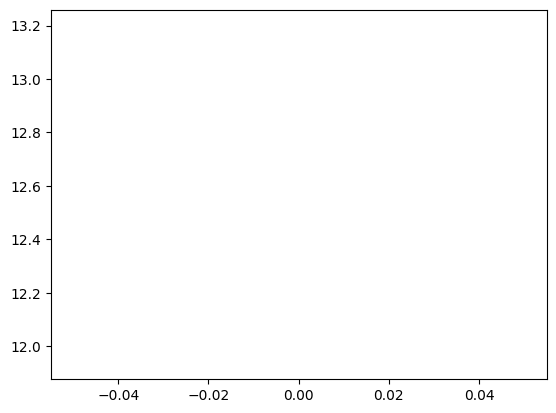

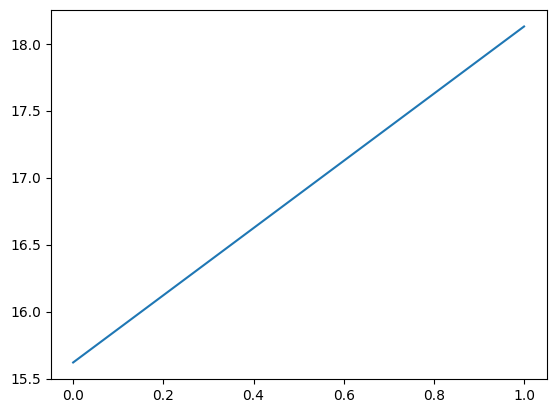

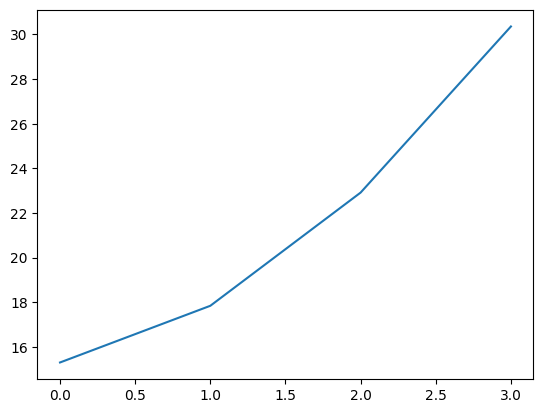

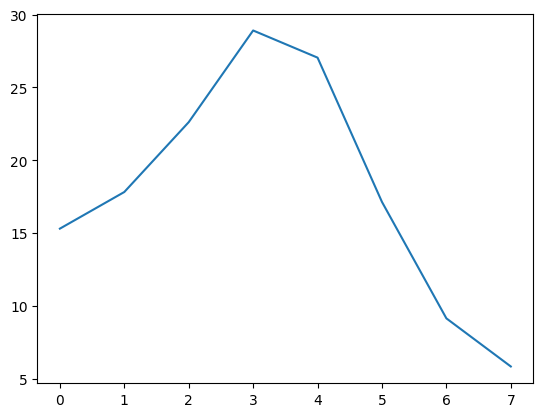

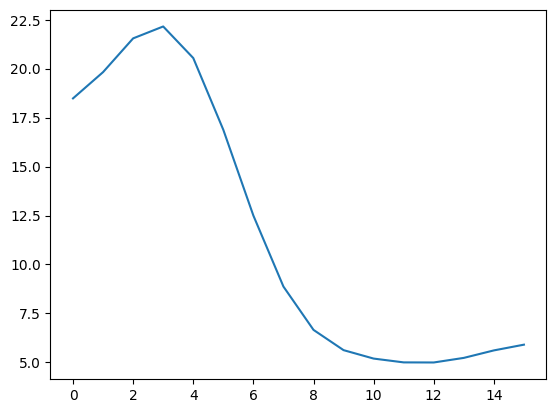

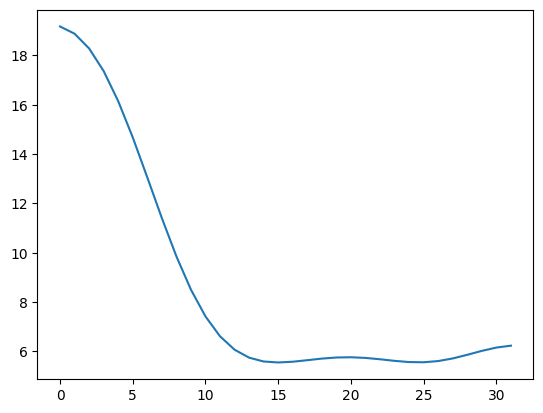

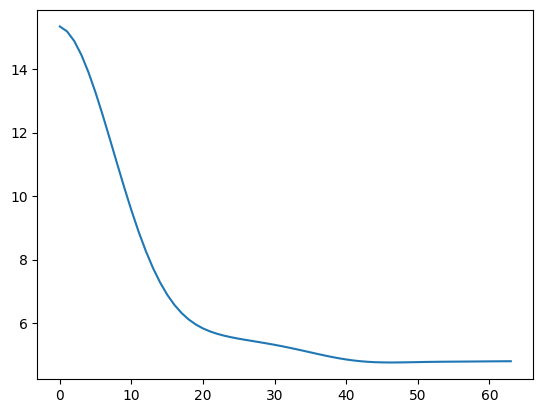

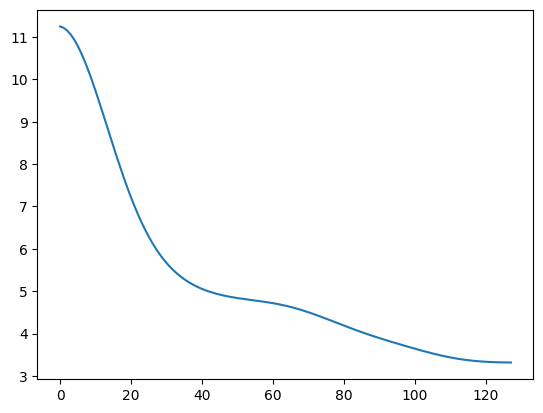

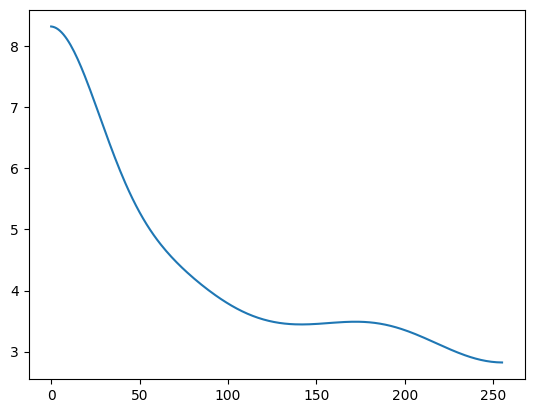

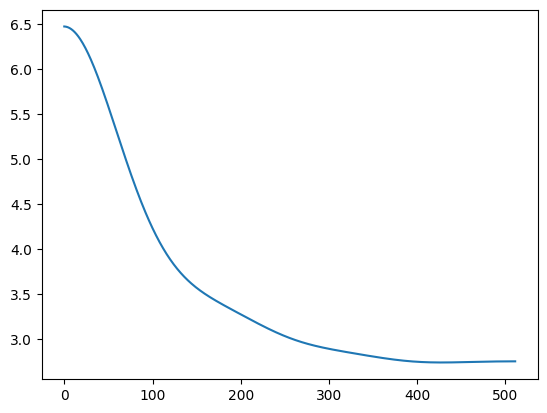

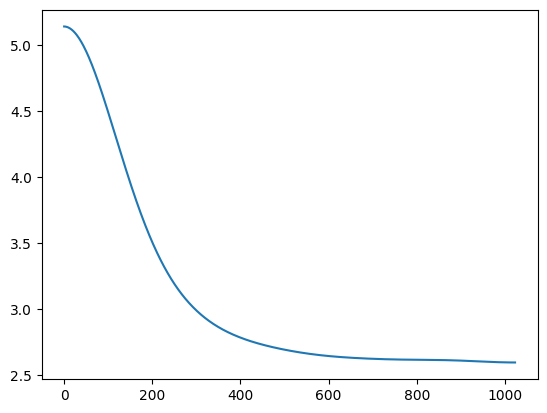

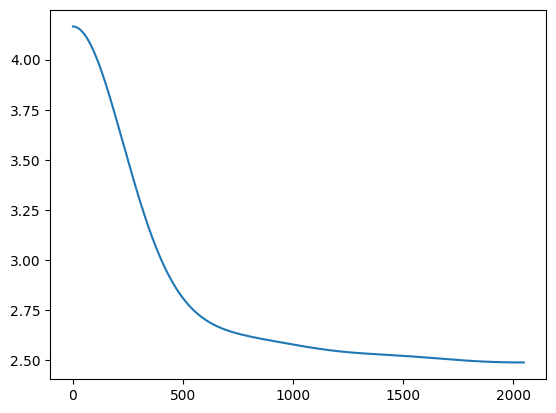

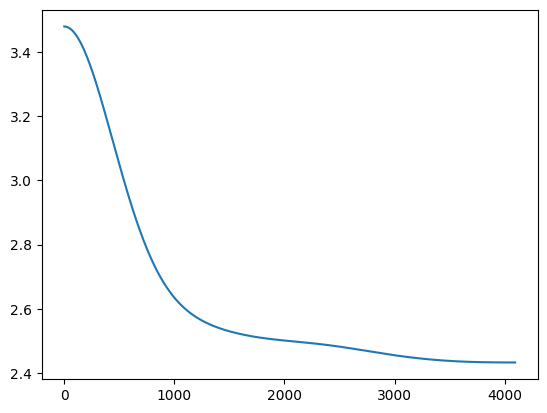

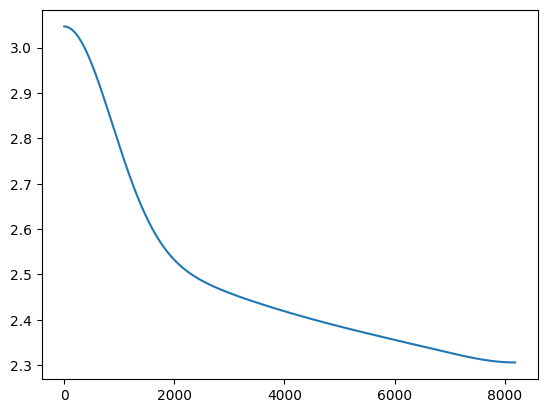

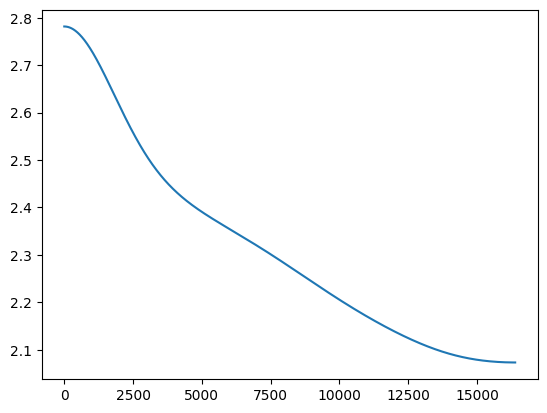

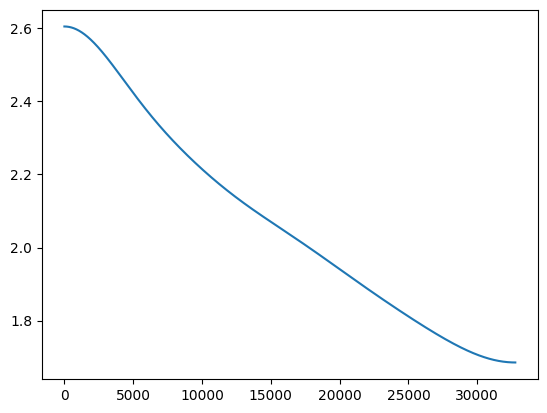

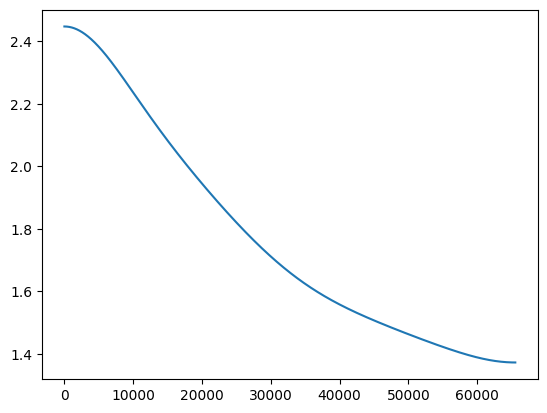

In [170]:
hsize = 10
net = LSTM(hsize, 1, 1)
optimizer = torch.optim.Adam(net.parameters())
losses = []
from scipy.ndimage import gaussian_filter1d

epochs = 100000
for i in tqdm(range(1, epochs)):
    a = torch.zeros(hsize)
    loss = 0
    
    x, y, n = geseq_len(10)
    
    for it in range(n):
        y_pred, a = net(x[it], a)
        loss += F.mse_loss(y_pred, y[it])
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    losses.append(loss.item())
    if i & (i - 1) == 0:
        plt.plot(gaussian_filter1d(losses, i // 10 + 1))
        plt.show()

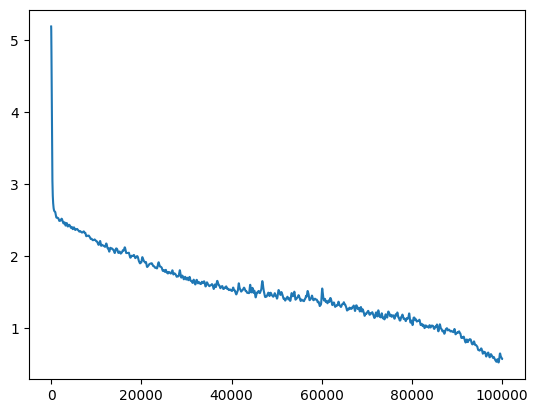

In [171]:
plt.plot(gaussian_filter1d(losses, 100))
plt.show()

In [172]:
x, y, n = geseq_len(20)
a = torch.zeros(hsize)
loss = 0

for it in range(n):
    y_pred, a = net(x[it], a)
    print(y[it].item(), y_pred.item())
    loss += F.mse_loss(y_pred, y[it])
    
print(loss.item())
print(loss.item() / n)

1.0 0.9107885360717773
0.0 -0.0629914402961731
0.0 0.00477147102355957
0.0 0.14593082666397095
1.0 0.9445787072181702
1.0 0.7650864720344543
1.0 0.6833693385124207
0.0 0.5060545802116394
0.0 0.5510234236717224
0.0 0.5443748831748962
0.0 0.5413810610771179
1.0 0.7760788798332214
1.0 0.7994107604026794
1.0 0.706169068813324
0.0 0.7377287745475769
1.0 0.7856170535087585
0.0 0.7574793696403503
1.0 0.8037487864494324
0.0 0.7915326952934265
1.0 0.8209940791130066
3.378685235977173
0.16893426179885865
